In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [6]:
# fnames = ["/home/annegret/Projects/Hubbard2024/data/mooring/GAK1_mooringdata_2017-2018/GAK1_2017_24m.dat",
#           "/home/annegret/Projects/Hubbard2024/data/mooring/GAK1_mooringdata_2018-2019/GAK1_2018_23m.dat",
#           "/home/annegret/Projects/Hubbard2024/data/mooring/GAK1_mooringdata_2019-2020/GAK1_2019_25m.dat"]

# fnames   = ["/home/annegret/Projects/Hubbard2024/data/mooring/GAK1_mooringdata_2017-2018/GAK1_2017_56m.dat",
#             "/home/annegret/Projects/Hubbard2024/data/mooring/GAK1_mooringdata_2018-2019/GAK1_2018_56m.dat",
#             "/home/annegret/Projects/Hubbard2024/data/mooring/GAK1_mooringdata_2019-2020/GAK1_2019_53m.dat"]

fnames = ["/home/annegret/Projects/Hubbard2024/data/mooring/GAK1_mooringdata_2017-2018/GAK1_2017_157m.dat",
          "/home/annegret/Projects/Hubbard2024/data/mooring/GAK1_mooringdata_2018-2019/GAK1_2018_144m.dat",
          "/home/annegret/Projects/Hubbard2024/data/mooring/GAK1_mooringdata_2019-2020/GAK1_2019_145m.dat"]

# fnames = ["/home/annegret/Projects/Hubbard2024/data/mooring/GAK1_mooringdata_2017-2018/GAK1_2017_199m.dat",
#           "/home/annegret/Projects/Hubbard2024/data/mooring/GAK1_mooringdata_2018-2019/GAK1_2018_198m.dat",
#           "/home/annegret/Projects/Hubbard2024/data/mooring/GAK1_mooringdata_2019-2020/GAK1_2019_198m.dat"]

In [7]:
format = "%Y-%m-%d"
df_all = pd.DataFrame(columns=["Date", "Depth [m]", "Temperature [deg C]"], index=None)
for fname in fnames:
    # figure out how many rows need to be skipped, differs between files
    num = 0
    with open(fname) as f:
        lines = f.readlines()
        datalines = [i for i, l in enumerate(lines) if not l.startswith("%" )]
        if len(datalines) > 0: num = datalines[0]
    # read in
    dfgak_ = pd.read_csv(fname, delimiter="\s+", skiprows=num, header=None, on_bad_lines='skip')
    # change type of date and time to string
    dfgak_[dfgak_.columns[0:6]] = dfgak_.iloc[:, 0:6].astype('string')
    # string to datetime
    datestr = [dfgak_.iloc[i,0]+"-"+dfgak_.iloc[i,1]+"-"+dfgak_.iloc[i,2] for i in range(dfgak_.shape[0])]
    # dfgak_["Date"] = pd.to_datetime(datestr)
    dfgak_["Date"] = [dt.datetime.strptime(d, format).date() for d in datestr]
    # only take relevant columns and add them to df_all
    dfgak_out = pd.DataFrame({"Date":dfgak_.Date, "Depth [m]":dfgak_[7], "Temperature [deg C]":dfgak_[8]})
    df_all = pd.concat([df_all, dfgak_out])  # normally not the best practice as memory/time inefficient

<>:11: SyntaxWarning: invalid escape sequence '\s'
<>:11: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_50852/323359187.py:11: SyntaxWarning: invalid escape sequence '\s'
  dfgak_ = pd.read_csv(fname, delimiter="\s+", skiprows=num, header=None, on_bad_lines='skip')
/tmp/ipykernel_50852/323359187.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_all = pd.concat([df_all, dfgak_out])  # normally not the best practice as memory/time inefficient


In [8]:
# use lowess filter to smooth time series, easier on day index rather than datetime format
t0 = dt.datetime.strptime("2017-01-01", "%Y-%m-%d").date()
t_index_data   = np.zeros(len(df_all.Date), dtype=int)
for (i, da) in enumerate(df_all.Date):
    deltat = da - t0
    t_index_data[i] = deltat.days
lowess = sm.nonparametric.lowess
z = lowess(df_all["Temperature [deg C]"], t_index_data, frac=1/20)
df_all["Temperature [deg C]"] = z[:,1]

Text(0.5, 1.0, 'GAK mooring at ~ 150 m depth')

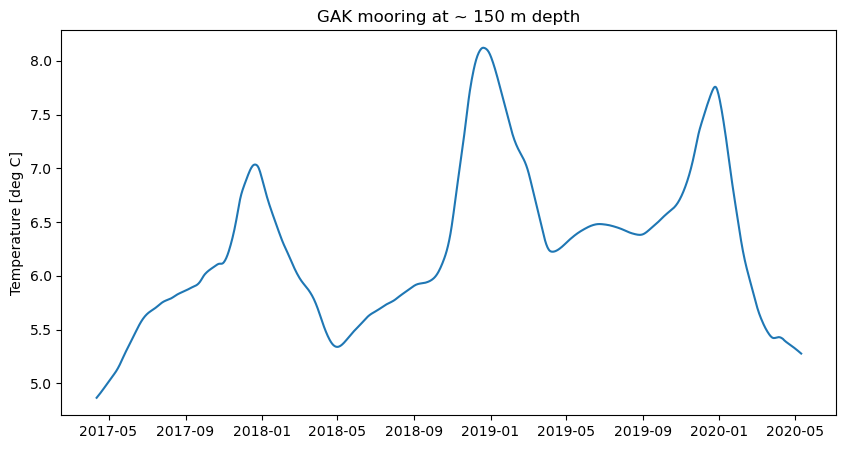

In [9]:
plt.figure(figsize=(10,5))
# plt.scatter(df_all.Date, df_all["Depth [m]"], 2, df_all["Temperature [deg C]"])
# plt.plot(df_all.Date, df_all["Temperature [deg C]"])
plt.plot(df_all.Date, df_all["Temperature [deg C]"])
plt.ylabel("Temperature [deg C]")
plt.title("GAK mooring at ~ 150 m depth")
# plt.savefig("GAK_150m.jpg")